Läser in datan och spara i lämpligt datastruktur

In [15]:
import re

# Ange sökvägen till din textfil pichi.txt
pichu1_path = "../data/pikachu1.txt"  

# Öppna och läs in textfilen
with open(pichu1_path, "r") as file:
    raw_text = file.read()

# Skriv ut den råa texten
print(raw_text)

# Fixa mellanslag i texten
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Kaptalisera varje mening och splitta dem
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Sammanfoga meningarna med nya rader
cleaned_text = ".\n".join(text_list)

# Skriv ut den rensade texten
print()
print(cleaned_text)

# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_pikachu1.txt", "w") as file:
    file.write(cleaned_text)

(18.137772263313835, 44.951493566608946)
(26.648661832322336, 41.49878057639454)
(26.180524428318897, 39.38100083914504)
(24.44364396490554, 40.175758410355904)
(21.201902279430513, 36.21004195868266)
(25.691541582957697, 37.24697337031557)
(19.338626083150515, 38.38085562147455)
(23.21718300802926, 40.88308718457233)
(23.444684475950478, 37.30114732596577)
(29.445791130252964, 37.20217384451559)
(28.51023528453833, 35.709930860090324)
(21.16066860901309, 41.31102957270099)
(24.00703335660358, 37.28941783811155)
(20.143822566361578, 44.054200130061275)
(28.951534072137846, 43.59635400253747)
(28.4462228380412, 35.70857349888654)
(21.581337497383593, 37.380046343689955)
(25.66739393839206, 41.68977778296281)
(25.30764253725807, 37.14236807370439)
(19.834071222595618, 36.32311848725025)
(27.150129600901813, 44.35514240580671)
(24.472548361435507, 40.710430933252844)
(27.3435177435667, 39.726710263117944)
(24.36424406634213, 42.846194242907536)
(18.006862753535323, 43.074969977666434)
(21

In [13]:
import re

# Ange sökvägen till din textfil pichi.txt
pichu1_path = "../data/pichu1.txt"  

# Öppna och läs in textfilen
with open(pichu1_path, "r") as file:
    raw_text = file.read()

# Skriv ut den råa texten
print(raw_text)

# Fixa mellanslag i texten
text_fixed_spacing = re.sub(r"\s+", " ", raw_text)

# Kaptalisera varje mening och splitta dem
text_list = [text.capitalize() for text in text_fixed_spacing.split(". ")]

# Sammanfoga meningarna med nya rader
cleaned_text = ".\n".join(text_list)

# Skriv ut den rensade texten
print()
print(cleaned_text)

# Öppna en ny txt-fil och skriv innehållet i cleaned_text
with open("../data/cleaned_pichu1.txt", "w") as file:
    file.write(cleaned_text)

(20.11541438766307, 28.701809671168824)
(15.200086041781336, 27.095070307714877)
(17.200234546952956, 27.669778220491132)
(16.785685905190583, 34.36654587712494)
(20.8917697133121, 31.480353852465935)
(20.41359589938329, 31.091310056669883)
(22.137436541638763, 26.71138648198097)
(15.695510661035328, 32.291267979503495)
(18.375374557482164, 26.634024937619284)
(15.238377755504562, 28.794554417576478)
(16.749103798428827, 34.895233506365955)
(19.042842304826898, 31.399997598540928)
(15.212287757470909, 30.569497437746463)
(16.59070120549319, 31.846142509898748)
(20.199075502236184, 33.4285192018981)
(19.35953184482573, 32.75999911546245)
(16.763524976325574, 27.290480719641042)
(19.71412547100727, 25.321002439040377)
(21.475443653422612, 28.154530480590818)
(15.051990077424488, 27.67740875975703)
(21.446554014662464, 27.109828435863264)
(20.585115159905815, 34.429097143350546)
(17.722004132143937, 33.76367626472669)
(16.24383599849425, 28.14677880798478)
(22.65770457765425, 31.554386652

In [16]:
with open("../data/test_points.txt" , "r") as file:
    raw = file.read()

print (raw)

(25, 35), (15,14), (26,30), (22,45)


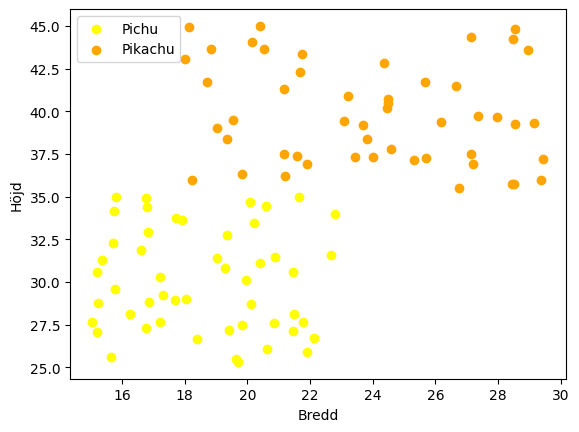

The test point is classified as: Pikachu


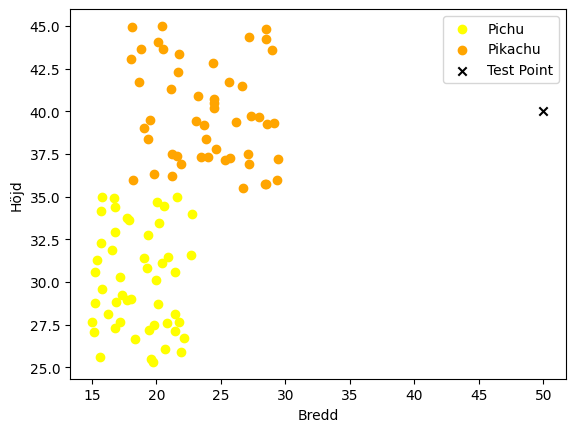

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# loads the data from the .txt file
def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            try:
                # Strip potential parentheses and whitespace, then split by comma
                line = line.strip().replace('(', '').replace(')', '')
                width, height = map(float, line.split(','))
                data.append([width, height])
            except ValueError as e:
                print(f"Error on line: {line}. Error: {e}")
    return np.array(data)

# Load Pichu and Pikachu data
pichu_data = load_data('../data/pichu1.txt')  
pikachu_data = load_data('../data/pikachu1.txt')


# This function is used to plot Pichu and Pikachu data points in different colors
def plot_data(pichu, pikachu, test_point=None):
    plt.scatter(pichu[:, 0], pichu[:, 1], c='yellow', label='Pichu')
    plt.scatter(pikachu[:, 0], pikachu[:, 1], c='orange', label='Pikachu')
    if test_point is not None:
        plt.scatter(test_point[0], test_point[1], c='black', marker='x', label='Test Point')
    plt.xlabel('Bredd')
    plt.ylabel('Höjd')
    plt.legend()
    plt.show()

plot_data(pichu_data, pikachu_data)

# This function prompts the user for a test point and handles invalid input
def input_test_point():
    while True:
        try:
            width = float(input("Enter width: "))
            height = float(input("Enter height: "))
            if width < 0 or height < 0:
                raise ValueError("Dimensions must be non-negative.")
            return np.array([width, height])
        except ValueError as e:
            print(f"Invalid input: {e}. Please enter positive numeric values.")


# This function calculates the Euclidean distance between two points
def calculate_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# This function is used to determine the nearest points
def classify_test_point(training_data, test_point, k=5):
    distances = np.array([calculate_distance(test_point, data_point) for data_point in training_data])
    # Find the k nearest points
    nearest_indices = np.argsort(distances)[:k]
    pichu_count = np.sum(nearest_indices < len(pichu_data))
    pikachu_count = k - pichu_count
    return 'Pichu' if pichu_count > pikachu_count else 'Pikachu'

# Combining Pichu and Pikachu data for the classification
combined_data = np.vstack((pichu_data, pikachu_data))


# Input a test point
test_point = input_test_point()

# Classify the test point
classification_result = classify_test_point(combined_data, test_point)
print(f"The test point is classified as: {classification_result}")

# Plotta data med testpunkten
plot_data(pichu_data, pikachu_data, test_point)